## Latar Belakang

Dalam penanganan penyakit jantung, ketersediaan data kesehatan pasien yang lengkap sangat berperan penting dalam proses diagnosis dan pemodelan risiko penyakit. Rumah sakit dengan fasilitas lengkap umumnya memiliki akses ke data kesehatan yang komprehensif, mulai dari hasil laboratorium, rekam medis elektronik, pemeriksaan penunjang, hingga catatan riwayat kesehatan yang detail. Data lengkap ini memungkinkan pemodelan risiko penyakit jantung yang lebih akurat dan mendalam.

Sebaliknya, di klinik-klinik dengan fasilitas terbatas, data kesehatan yang tersedia seringkali kurang lengkap atau hanya mencakup informasi dasar, seperti tekanan darah, berat badan, dan keluhan pasien. Keterbatasan data ini menjadi tantangan tersendiri dalam mengembangkan model prediksi risiko penyakit jantung yang efektif, karena model harus mampu bekerja dengan informasi yang lebih terbatas namun tetap memberikan hasil yang dapat diandalkan.

Perbedaan kualitas dan kelengkapan data antara rumah sakit dan klinik ini menimbulkan kebutuhan untuk menguji dan membandingkan pendekatan pemodelan risiko yang dapat diimplementasikan pada kedua kondisi tersebut. Dengan demikian, petugas kesehatan di berbagai fasilitas, baik yang memiliki data lengkap maupun yang terbatas, dapat memperoleh alat bantu prediksi yang sesuai dan mendukung pengambilan keputusan klinis secara optimal.

## Rumusan Masalah


* Sejauh mana fasilitas sederhana (dengan fitur terbatas yang mudah diperoleh di lapangan) mampu mendeteksi potensi penyakit jantung secara akurat?.  
  Dalam hal ini sebuah desa terpencil hanya memiliki tensimeter dan glukometer.

* Seberapa besar peningkatan performa yang diperoleh jika digunakan fitur-fitur dari fasilitas canggih (seperti alat EKG atau tes laboratorium)?

* Apakah model machine learning berbasis data sederhana dapat diandalkan sebagai alat bantu skrining awal, terutama di daerah terpencil yang minim tenaga spesialis dan peralatan?

| Nama Kolom         | Penjelasan Medis & Cara Didapatkan                                                                                                                                                  |
| ------------------ | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Age**            | Usia pasien (dalam tahun). Faktor risiko utama, makin tua, makin tinggi risiko. Didapat dari data identitas.                                                                        |
| **Sex**            | Jenis kelamin (0 = wanita, 1 = pria). Pria cenderung lebih berisiko. Data administratif.                                                                                            |
| **ChestPainType**  | Tipe nyeri dada: angina tipikal, atipikal, non-anginal, atau tidak ada nyeri. Informasi ini didapat dari wawancara klinis.                                                          |
| **RestingBP**      | Tekanan darah saat istirahat (mmHg). Pengukuran langsung menggunakan tensimeter.                                                                                                    |
| **Cholesterol**    | Kadar kolesterol total dalam darah (mg/dL). Harus diuji di laboratorium.                                                                                                            |
| **FastingBS**      | Gula darah puasa (> 120 mg/dL = 1, lainnya = 0). Diuji dengan alat glukometer atau lab.                                                                                             |
| **RestingECG**     | Hasil elektrokardiogram saat istirahat: normal, kelainan ringan, atau kelainan parah. Butuh alat EKG.                                                                               |
| **MaxHR**          | Detak jantung maksimal saat olahraga. Biasanya diperoleh dari tes treadmill atau stress test.                                                                                       |
| **ExerciseAngina** | Apakah pasien mengalami angina (nyeri dada) saat berolahraga (1 = ya, 0 = tidak). Ditentukan lewat wawancara dan/atau uji latihan.                                                  |
| **Oldpeak**        | Depresi segmen ST dari EKG setelah latihan, mengindikasikan iskemia (penurunan aliran darah). Diperoleh dari tes EKG setelah stres.                                                 |
| **ST\_Slope**      | Bentuk kemiringan segmen ST dari EKG saat stres: naik, datar, atau turun. Perlu alat EKG.                                                                                           |
| **HeartDisease**   | Label target: apakah pasien mengidap penyakit jantung (1 = ya, 0 = tidak). Ditetapkan oleh dokter dari diagnosis menyeluruh (bisa berdasarkan tes lab, EKG, observasi klinis, dll). |


| Kolom              | Deskripsi                                                                                                                                                                           |
| ------------------ | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Age**            | Usia pasien (dalam tahun).                                                                       |
| **Sex**            | Jenis kelamin (0 = wanita, 1 = pria).                                                                                          |
| **ChestPainType**  | Tipe nyeri dada: angina tipikal, atipikal, non-anginal, atau tidak ada nyeri.                                                         |
| **RestingBP**      | Tekanan darah saat istirahat (mmHg).                                                                                                    |
| **Cholesterol**    | Kadar kolesterol total dalam darah (mg/dL).                                                                                                           |
| **FastingBS**      | Kadar gula darah (> 120 mg/dL = 1, lainnya = 0).                                                                                             |
| **RestingECG**     | Hasil elektrokardiogram saat istirahat: normal, ST(Potensi iskelemia, infark miokard), LVH(Pembesaran bilik kiri).                                                                               |
| **MaxHR**          | Detak jantung maksimal saat olahraga (bpm).                                                                                       |
| **ExerciseAngina** | Nyeri dada saat berolahraga (1 = ya, 0 = tidak).                                                  |
| **Oldpeak**        | Penurunan segmen ST dari hasil EKG setelah aktivitas fisik.                                                 |
| **ST\_Slope**      | Bentuk kemiringan segmen ST dari EKG saat aktivitas fisik.                                                                                           |
| **HeartDisease**   | Label target: apakah pasien mengidap penyakit jantung (1 = ya, 0 = tidak).|


## Pendalaman Domain

### ChestPainType

| Kode / Label         | Penjelasan Klinis                                                                                                                                               |
| -------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Typical Angina**   | Nyeri dada khas akibat kurangnya suplai darah ke jantung (iskemia). Muncul saat aktivitas fisik atau stres dan mereda saat istirahat atau dengan nitrogliserin. |
| **Atypical Angina**  | Gejala nyeri dada yang mirip angina tapi tidak memenuhi semua kriteria khas. Bisa jadi berasal dari jantung atau organ lain.                                    |
| **Non-anginal Pain** | Nyeri dada yang tidak terkait dengan iskemia jantung. Bisa berasal dari otot, paru-paru, pencernaan (seperti GERD), atau kecemasan.                             |
| **Asymptomatic**     | Tidak ada keluhan nyeri dada. Bisa jadi pasien tidak merasakan gejala walaupun ada penyakit jantung ("silent ischemia").                                        |


Ciri-ciri Nyeri Dada pada Typical Angina (Angina Pektoris Klasik)
Nyeri dada karena angina khas memiliki tiga ciri utama, menurut pedoman klinis (termasuk American College of Cardiology):

1. Lokasi dan Karakter Nyeri
Terasa di belakang tulang dada (retrosternal).
Digambarkan sebagai rasa:
Terhimpit (seperti ditekan benda berat),Terbakar,
Sesak atau tercekik, Kadang menjalar ke lengan kiri, leher, rahang, atau punggung.

2. Dipicu oleh Aktivitas Fisik atau Emosi
Timbul saat:

* Berjalan cepat
* Naik tangga
* Emosi/tekanan psikologis

    Karena jantung butuh lebih banyak oksigen saat aktivitas → pembuluh darah menyempit → nyeri.

3. Reda dengan Istirahat atau Nitrogliserin
Biasanya membaik dalam 5–10 menit setelah berhenti beraktivitas atau konsumsi obat vasodilator (misalnya nitrogliserin).

| Nilai (String) | Penjelasan Klinis Singkat                                                                      |
| -------------- | ---------------------------------------------------------------------------------------------- |
| **Normal**     | Pola EKG tidak menunjukkan abnormalitas.                                                       |
| **ST**         | Terjadi kelainan pada **segmen ST** → bisa berarti **iskemia** atau **infark miokard**.        |
| **LVH**        | **Left Ventricular Hypertrophy** → pembesaran otot bilik kiri jantung, bisa karena hipertensi. |


### ST_Slope

| Nilai (kode) | Deskripsi                  | Makna Klinis Singkat                                |
| ------------ | -------------------------- | --------------------------------------------------- |
| 1            | **Upward slope** (naik)    | Segmen ST naik, ini biasanya normal atau lebih baik |
| 2            | **Flat slope** (datar)     | Segmen ST datar, bisa menandakan iskemia ringan     |
| 3            | **Downward slope** (turun) | Segmen ST turun, indikasi iskemia serius            |


Gambaran ECG

![PQRST ECG Heart.png](<attachment:PQRST ECG Heart.png>)
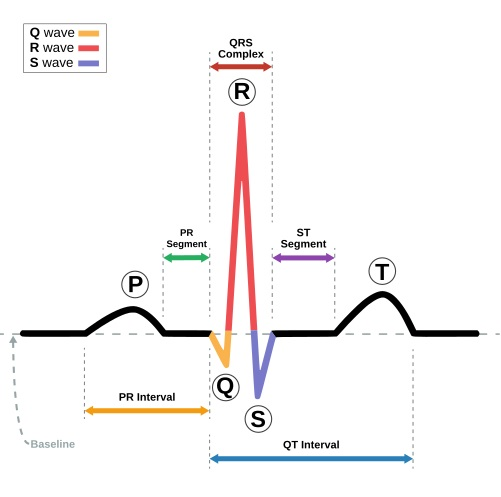

In [1]:

# Basic
import numpy as np
import pandas as pd
import seaborn as sns

# Viz
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import category_encoders as ce


# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier
import lightgbm as lgb
from scipy.stats import uniform, randint
from sklearn.model_selection import StratifiedKFold

# Metrics (Evaluasi Model)
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, mean_squared_error, r2_score
)

# Model selection
from sklearn.model_selection import cross_val_score, RandomizedSearchCV

# Warning
import warnings
warnings.filterwarnings('ignore')




In [2]:
df = pd.read_csv(r"C:\Users\Hewlett Packard\Desktop\SAYA\Porto 3\Heart Dieses\archive (7)\heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## EDA

Terlihat nilai 0 pada kolom `RestingBP`, seharusnya ini fenomena yang tidak mungkin terjadi, oleh karena itu nilai ini dianggap salah input maka kami akan mengisinya dengan median

In [4]:
df['RestingBP'] = df['RestingBP'].replace(0, np.nan) # Replace 0 with NaN
df["RestingBP"].fillna(df["RestingBP"].median(), inplace=True) # Fill NaN with median

Begitu pula `Cholesterol`, terlihat nilai 0 pada kolom ini, maka nilai ini dianggap salah input dan kami akan mengisinya dengan median. Selain itu terdapat outlier ekstrim yaitu `Cholesterol` > 400, dalam hal ini kami akan melakukan binning untuk menanganinya

In [5]:
df["Cholesterol"] =  df["Cholesterol"].replace(0, np.nan) # Replace 0 with NaN
df["Cholesterol"].fillna(df["Cholesterol"].median(), inplace=True) # Fill NaN dengan median agar tahan outlier

In [6]:
df["Cholesterol"].describe()

count    918.000000
mean     243.204793
std       53.401297
min       85.000000
25%      214.000000
50%      237.000000
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64

In [7]:
df[df["Cholesterol"] > 400].shape[0] # 4 data outlier

13

Dalam dunia medis `Oldpeak` < 0 bisa berarti noise dan tidak valid, oleh karena itu nilai ini kami ganti dengan nilai 0

In [8]:
df['Oldpeak'] = df['Oldpeak'].apply(lambda x: x if x >= 0 else 0)

## Preprocessing

Binning:  
Cholesterol dibinning karena ada outlier dan kita tetap ingin mempertahankan outlier ini

OneHot untuk data dengan sedikit kategori dan tidak berjenjang:  
ExerciseAngina, RestingECG, ST_Slope, ChestPainType, Sex, FastingBS, RestingECG

StandardScaling untuk data terdistribusi normal:  
MaxHR, Age, RestingBP

RobustScaling agar tahan outlier:  
Oldpeak

Preprocessing dilakukan setelah splitting dengan pipeline menghindari leakage


### Fitur dan Target

In [9]:
target = df['HeartDisease']
features = df.drop(columns=['HeartDisease'])

### Splitting

In [10]:

X = features
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)

### Binning function for `Cholesterol`

In [11]:
import numpy as np

def bin_cholesterol_array(X):
    # Ubah ke array dulu biar aman
    X = np.array(X)

    # Pastikan bentuknya 1D (kadang masuknya (n_samples, 1), kadang (n_samples,))
    if X.ndim == 2:
        X = X[:, 0]  # Ambil kolom pertama

    # Apply binning
    result = []
    for chol in X:
        if chol < 200:
            result.append('normal')
        elif chol < 240:
            result.append('borderline')
        elif chol <= 400:
            result.append('high')
        else:
            result.append('extreme')
    
    return np.array(result).reshape(-1, 1)  # Kembalikan ke array 2D

### Pipeline preprocessor

In [12]:

# Step 2: FunctionTransformer
binning_transformer = Pipeline([
    ('bin_func', FunctionTransformer(bin_cholesterol_array, validate=False)),
    ('ordinal_enc', OrdinalEncoder(categories=[['normal', 'borderline', 'high', 'extreme']]))
])

# Fitur lainnya
onehot_features = ['ExerciseAngina', 'RestingECG', 'ST_Slope', 'ChestPainType', 'Sex', 'FastingBS']
standard_features = ['MaxHR', 'Age', 'RestingBP']
robust_features = ['Oldpeak']
cholesterol_feature = ['Cholesterol']  # ini masuk ke pipeline binning

# Pipelines lainnya
onehot_pipeline = Pipeline([
    ('onehot', OneHotEncoder(drop="first",handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('chol_bin', binning_transformer, cholesterol_feature),
    ('onehot', onehot_pipeline, onehot_features),
    ('standard', StandardScaler(), standard_features),
    ('robust', RobustScaler(), robust_features)
])


### Cek Multicollinearity
Sebelum train ada baiknya kita memeriksa multikolinearitas model linear seperti logreg berpotensi mengalami masalah jika multikolinearitas diabaikan

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# Ambil fitur numerik saja (jangan masukin target)
features = df.drop(columns=['HeartDisease'])

# Kalau ada fitur kategori, encode dulu jadi numerik
# Contoh sederhana, encode kategori dengan label encoding:
from sklearn.preprocessing import LabelEncoder
features_encoded = features.copy()
for col in features_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    features_encoded[col] = le.fit_transform(features_encoded[col].astype(str))

# Hitung VIF
vif_data = pd.DataFrame()
vif_data['feature'] = features_encoded.columns
vif_data['VIF'] = [variance_inflation_factor(features_encoded.values, i) for i in range(features_encoded.shape[1])]

print(vif_data.sort_values(by='VIF', ascending=False))


           feature        VIF
3        RestingBP  50.740813
0              Age  32.493294
7            MaxHR  27.465261
4      Cholesterol  20.429096
10        ST_Slope   9.455441
1              Sex   4.831442
6       RestingECG   3.463739
9          Oldpeak   2.647559
8   ExerciseAngina   2.530672
2    ChestPainType   2.009370
5        FastingBS   1.411122


Jika kita lihat ada beberapa fitur yang nilai vifnya jauh di atas 4, sementara kita akan coba train tanpa drop fitur2 tersebut

>## Training Model

## Baseline Model (LogReg, KNN, Decision Tree) Tanpa Hyperparameter Tuning

Pertama - tama mari kita train model machine learning dengan baseline model (LogReg, KNN, Decision Tree) tanpa hyper parameter tuning, kita akan melihat nilai score rata2 validasi dan score prediksinya

#### Validasi Model dengan Cross-Validation

In [14]:
logreg = LogisticRegression(random_state=10)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=10)

In [15]:
models = [logreg,knn,tree]
score=[]
rata=[]
std=[]

for i in models:
    skfold=StratifiedKFold(n_splits=10, shuffle=True, random_state=10)
    estimator=Pipeline([
        ('preprocess',preprocessor),
        ('model',i)])
    model_cv=cross_val_score(estimator,X_train,y_train,cv=skfold,scoring='recall')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
df_baseline_model_without_hp = pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree'],'mean recall':rata,'sdev':std}).set_index('model').sort_values(by='mean recall',ascending=False)
df_baseline_model_without_hp

,mean recall,sdev
model,,
KNN,0.884146,0.051998
Logistic Regression,0.871768,0.057687
Decision Tree,0.788415,0.055346


#### Prediksi dan Evaluasi pada Data Test

In [16]:
models = [logreg,knn,tree]
score_recall = []

def y_pred_func(model, X_train, X_test, y_train):
    estimator = Pipeline([
        ('preprocess', preprocessor),
        ('model', model)
    ])
    estimator.fit(X_train, y_train)
    return estimator, estimator.predict(X_test)

# Pastikan X_train, X_test, y_train, y_test sudah didefinisikan sebelumnya
for model, name in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree']):
    estimator, y_pred = y_pred_func(model, X_train, X_test, y_train)
    recall = recall_score(y_test, y_pred)
    score_recall.append(recall)
    print(name, '\n', classification_report(y_test, y_pred))

df_baseline_test_without_hp = pd.DataFrame({
    'model': ['Logistic Regression', 'KNN', 'Decision Tree'],
    'recall score': score_recall
}).set_index('model').sort_values(by='recall score', ascending=False)
df_baseline_test_without_hp

Logistic Regression 
               precision    recall  f1-score   support

           0       0.89      0.85      0.87        82
           1       0.89      0.91      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184

KNN 
               precision    recall  f1-score   support

           0       0.87      0.82      0.84        82
           1       0.86      0.90      0.88       102

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

Decision Tree 
               precision    recall  f1-score   support

           0       0.73      0.80      0.76        82
           1       0.83      0.75      0.79       102

    accuracy                           0.78       184
   macro avg       0.78      0.78      0.78       184
weighted avg       0.78      0

,recall score
model,
Logistic Regression,0.911765
KNN,0.901961
Decision Tree,0.754902


Logistic Regression dan KNN memiliki nilai yang bersaing lebih lanjutnya mari kita train dengan hyperparameter tuning

## Base Model Terpilih(LogReg dan KNN) Dengan Hyperparameter Tuning


### LogReg with Hyperparameter Tuning 

#### Validasi Model dengan Cross-Validation

In [17]:
pipeline_logreg = Pipeline([
    ('preprocessor', preprocessor),          
    ('logreg', LogisticRegression(solver= "liblinear", random_state= 10)) 
    ])

hyperparam_space = {
    'logreg__penalty': ['l1', 'l2'],
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'logreg__solver': ['liblinear', 'saga'],  
}

skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)


random_search = RandomizedSearchCV(
    estimator=pipeline_logreg,
    param_distributions=hyperparam_space, 
    n_iter=50,  
    cv=skfold,  
    scoring='recall',
    n_jobs=-1,
    random_state=10,
    verbose=1 
)

random_search.fit(X_train, y_train)

cv_scores = random_search.cv_results_['mean_test_score']
mean_overall = np.mean(cv_scores)
std_dev = np.std(cv_scores)

# Menyimpan rata2 dan standard deviasi model
logreg_with_hp_mean = mean_overall
logreg_with_hp_std = std_dev

print("Best Parameters:", random_search.best_params_)
print("Best CV Score:", random_search.best_score_)
print("Rata-rata keseluruhan skor CV:", mean_overall)
print("Standar Deviasi dari skor CV:", std_dev)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'logreg__solver': 'saga', 'logreg__penalty': 'l1', 'logreg__C': 0.001}
Best CV Score: 1.0
Rata-rata keseluruhan skor CV: 0.8420819532269398
Standar Deviasi dari skor CV: 0.18591514780507


#### Prediksi dan Evaluasi pada Data Test

In [18]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)


print(recall_score(y_test, y_pred))

# Mencetak classification report untuk metrik lebih lengkap
print(classification_report(y_test, y_pred))

1.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        82
           1       0.55      1.00      0.71       102

    accuracy                           0.55       184
   macro avg       0.28      0.50      0.36       184
weighted avg       0.31      0.55      0.40       184



Recall score menunjukan nilai 1.0 ini jelas tidak masuk akal, selanjutnya kita coba retrain logreg tanpa fitur-fitur tersebut(klo sempat)

In [19]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)


print(recall_score(y_test, y_pred))

# Mencetak classification report untuk metrik lebih lengkap
print(classification_report(y_test, y_pred))

1.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        82
           1       0.55      1.00      0.71       102

    accuracy                           0.55       184
   macro avg       0.28      0.50      0.36       184
weighted avg       0.31      0.55      0.40       184



Dari sini bila kita perhatikan score recall logistic regression mencapai 1.0, ini jelas bukan tanda yang bagus mengingat standard deviasinya yang tinggi. Dengan pertimbangan ini dan juga nilai multikolinearitasnya yang tinggi model logistic regression tidak akan digunakan.

### KNN with Hyperparameter Tuning

#### Validasi Model dengan Cross-Validation

In [20]:

pipeline_knn = Pipeline([
    ('preprocessor', preprocessor),          # Step 1: Preprocessing pakai ColumnTransformer
    ('knn', KNeighborsClassifier()) 
    ])

hyperparam_space = {
    'knn__n_neighbors': [3, 5 ,9],
    'knn__weights': ['distance', 'uniform'], # 'uniform', 'distance'
    'knn__leaf_size': [10, 20, 30], # 10, 20, 30
    'knn__metric': ['euclidean', 'manhattan'] # 'euclidean', 'manhattan'
}

skfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 10)


random_search = RandomizedSearchCV(
    estimator=pipeline_knn,
    param_distributions=hyperparam_space,  
    n_iter=50, 
    cv=skfold,  
    scoring='recall',  
    n_jobs=-1, 
    random_state=10,  
    verbose=1  
)

random_search.fit(X_train, y_train)

cv_scores = random_search.cv_results_['mean_test_score']
mean_overall = np.mean(cv_scores)
std_dev = np.std(cv_scores)

# Menyimpan rata2 dan standard deviasi model
knn_with_hp_mean = mean_overall
knn_with_hp_std = std_dev

print("Best Parameters:", random_search.best_params_)
print("Best CV Score:", random_search.best_score_)
print("Rata-rata keseluruhan skor CV:", mean_overall)
print("Standar Deviasi dari skor CV:", std_dev)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'knn__weights': 'uniform', 'knn__n_neighbors': 9, 'knn__metric': 'euclidean', 'knn__leaf_size': 10}
Best CV Score: 0.9040048178259561
Rata-rata keseluruhan skor CV: 0.894384221619994
Standar Deviasi dari skor CV: 0.004200721878583354


#### Prediksi dan Evaluasi pada Data Test

In [21]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)


print(recall_score(y_test, y_pred))

# Mencetak classification report untuk metrik lebih lengkap
print(classification_report(y_test, y_pred))

0.8823529411764706
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        82
           1       0.87      0.88      0.87       102

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



### Decision Tree with Hyperparameter Tuning

#### Validasi Model dengan Cross-Validation

In [22]:
pipeline_tree = Pipeline([
    ('preprocessor', preprocessor), # Step 1: Preprocessing pakai ColumnTransformer
    ('tree', DecisionTreeClassifier(random_state=10)) 
    ])

hyperparam_space = {
    'tree__criterion': ['gini', 'entropy'],
    'tree__max_depth': [2, 3, 4, 5],
    'tree__min_samples_split': [2, 5],
    'tree__min_samples_leaf': [2, 4],
    'tree__max_features': ['sqrt', 'log2'],
    'tree__class_weight': ['balanced']
}

skfold = StratifiedKFold(n_splits = 5, random_state=10, shuffle=True)


random_search = RandomizedSearchCV(
    estimator=pipeline_tree,
    param_distributions=hyperparam_space,
    n_iter=50,  
    cv=skfold,  
    scoring='recall',  
    n_jobs=-1,  
    random_state=10, 
    verbose=1  
)

random_search.fit(X_train, y_train)

cv_scores = random_search.cv_results_['mean_test_score']
mean_overall = np.mean(cv_scores)
std_dev = np.std(cv_scores)

# Menyimpan rata2 dan standard deviasi model
tree_with_hp_mean = mean_overall
tree_with_hp_std = std_dev

print("Best Parameters:", random_search.best_params_)
print("Best CV Score:", random_search.best_score_)
print("Rata-rata keseluruhan skor CV:", mean_overall)
print("Standar Deviasi dari skor CV:", std_dev)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'tree__min_samples_split': 2, 'tree__min_samples_leaf': 2, 'tree__max_features': 'log2', 'tree__max_depth': 5, 'tree__criterion': 'entropy', 'tree__class_weight': 'balanced'}
Best CV Score: 0.8473050286058417
Rata-rata keseluruhan skor CV: 0.6869015356820235
Standar Deviasi dari skor CV: 0.08725046601117935


#### Prediksi dan Evaluasi pada Data Test

In [23]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)


print(recall_score(y_test, y_pred))

# Mencetak classification report untuk metrik lebih lengkap
print(classification_report(y_test, y_pred))

0.8333333333333334
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        82
           1       0.86      0.83      0.85       102

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184



## Ensemble Model (Random Forest, Xgboost, lgb) Tanpa Hyperparameter Tuning

#### Validasi Model dengan Cross-Validation

In [24]:
rf = RandomForestClassifier(random_state= 10)
xgb = XGBClassifier(random_state= 10)
lgbm = lgb.LGBMClassifier(random_state= 10, verbosity= -1)

In [25]:
models = [rf,xgb,lgbm]
score=[]
rata=[]
std=[]

for i in models:
    skfold=StratifiedKFold(n_splits=5, shuffle=True, random_state= 10)
    estimator=Pipeline([
        ('preprocess',preprocessor),
        ('model',i)])
    model_cv=cross_val_score(estimator,X_train,y_train,cv=skfold,scoring='recall')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
df_ensemble_model_without_hp = pd.DataFrame({'model':['Random Forest', 'XGBoost', 'LightGBM'],'mean recall':rata,'sdev':std}).set_index('model').sort_values(by='mean recall',ascending=False)
df_ensemble_model_without_hp

,mean recall,sdev
model,,
XGBoost,0.886902,0.046906
LightGBM,0.886781,0.023423
Random Forest,0.881933,0.041039


#### Prediksi dan Evaluasi pada Data Test

In [26]:
models = [rf,xgb,lgbm]
score_recall = []



def y_pred_func(model, X_train, X_test, y_train):
    estimator = Pipeline([
        ('preprocess', preprocessor),
        ('model', model)
    ])
    estimator.fit(X_train, y_train)
    return estimator, estimator.predict(X_test)

# Pastikan X_train, X_test, y_train, y_test sudah didefinisikan sebelumnya
for model, name in zip(models, ['Random Forest', 'XGBoost', 'LightGBM']):
    estimator, y_pred = y_pred_func(model, X_train, X_test, y_train)
    recall = recall_score(y_test, y_pred)
    score_recall.append(recall)
    print(name, '\n', classification_report(y_test, y_pred))

ensemble_model_test_df = pd.DataFrame({
    'model': ['Random Forest', 'XGBoost', 'LightGBM'],
    'recall score': score_recall
}).set_index('model').sort_values(by='recall score', ascending=False)
ensemble_model_test_df

Random Forest 
               precision    recall  f1-score   support

           0       0.87      0.88      0.87        82
           1       0.90      0.89      0.90       102

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.88       184
weighted avg       0.89      0.89      0.89       184

XGBoost 
               precision    recall  f1-score   support

           0       0.85      0.87      0.86        82
           1       0.89      0.87      0.88       102

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184

LightGBM 
               precision    recall  f1-score   support

           0       0.82      0.85      0.84        82
           1       0.88      0.85      0.87       102

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85    

,recall score
model,
Random Forest,0.892157
XGBoost,0.872549
LightGBM,0.852941


## Ensemble Model (Random Forest, XGBoost, LightGBM) Dengan Hyperparameter Tuning

### Random Forest with Hyperparameter Tuning

#### Validasi Model dengan Cross-Validation

In [27]:
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),  # Memanggil preprocessor dari atas       
    ('rf', RandomForestClassifier(random_state=42)) 
    ])

hyperparam_space = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [10, 20],
    'rf__min_samples_leaf': [3, 5, 7],
    'rf__class_weight': ['balanced']
}

skfold = StratifiedKFold(n_splits = 5, random_state=10, shuffle=True)


random_search = RandomizedSearchCV(
    estimator=pipeline_rf,
    param_distributions=hyperparam_space,  
    n_iter=50,  
    cv=skfold,   
    scoring='recall',  
    n_jobs=-1,  
    random_state=10,  
    verbose=1  
)

random_search.fit(X_train, y_train)

cv_scores = random_search.cv_results_['mean_test_score']
mean_overall = np.mean(cv_scores)
std_dev = np.std(cv_scores)

# Menyimpan rata2 dan standard deviasi model
rf_with_hp_mean = mean_overall
rf_with_hp_std = std_dev

print("Best Parameters:", random_search.best_params_)
print("Best CV Score:", random_search.best_score_)
print("Rata-rata keseluruhan skor CV:", mean_overall)
print("Standar Deviasi dari skor CV:", std_dev)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'rf__n_estimators': 200, 'rf__min_samples_leaf': 5, 'rf__max_depth': 20, 'rf__class_weight': 'balanced'}
Best CV Score: 0.8942186088527551
Rata-rata keseluruhan skor CV: 0.8884924219612566
Standar Deviasi dari skor CV: 0.003380128037990341


Jumlah feature names: 15
Jumlah feature importances: 15
              feature  importance
5         ST_Slope_Up    0.208797
4       ST_Slope_Flat    0.176452
1    ExerciseAngina_Y    0.126737
14            Oldpeak    0.117067
11              MaxHR    0.095925
12                Age    0.066355
13          RestingBP    0.044338
6   ChestPainType_ATA    0.042024
9               Sex_M    0.036581
10        FastingBS_1    0.027863


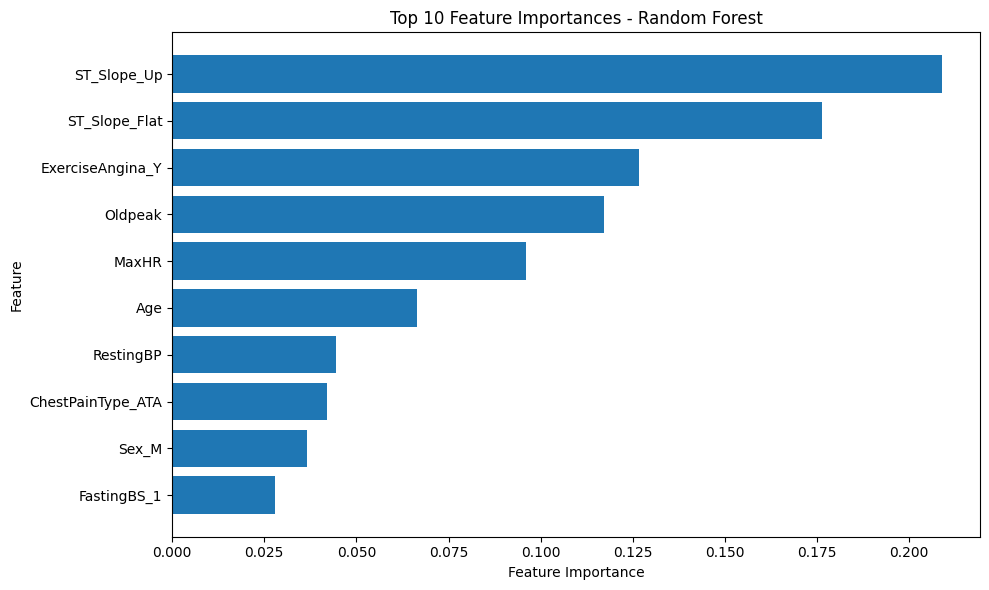

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ambil pipeline terbaik
best_pipeline = random_search.best_estimator_

# Ambil model RandomForest dari pipeline
rf_model = best_pipeline.named_steps['rf']

# Ambil preprocessor (sudah di-fit)
preprocessor = best_pipeline.named_steps['preprocessor']

# Ambil nama-nama fitur hasil transformasi
try:
    feature_names = preprocessor.get_feature_names_out()
except:
    # Kalau preprocessor gabungan (ColumnTransformer), kita ambil manual
    feature_names = []
    for name, transformer, cols in preprocessor.transformers_:
        if transformer == 'drop':
            continue
        elif transformer == 'passthrough':
            feature_names.extend(cols)
        else:
            try:
                # Bisa panggil get_feature_names_out
                names = transformer.get_feature_names_out(cols)
                feature_names.extend(names)
            except:
                # Kalau tidak bisa, pakai nama kolom mentahnya
                feature_names.extend(cols)

# Pastikan panjangnya cocok
print(f"Jumlah feature names: {len(feature_names)}")
print(f"Jumlah feature importances: {len(rf_model.feature_importances_)}")

# Sekarang aman bikin DataFrame
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': rf_model.feature_importances_
}).sort_values(by='importance', ascending=False)

# Tampilkan 10 besar
print(feature_importance_df.head(10))

# Plot top 10
plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['feature'][:10][::-1], feature_importance_df['importance'][:10][::-1])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances - Random Forest')
plt.tight_layout()
plt.show()


In [29]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)


rf_with_hp_test_score = recall_score(y_test, y_pred)
print(rf_with_hp_test_score)
# Mencetak classification report untuk metrik lebih lengkap
print(classification_report(y_test, y_pred))

0.8529411764705882
              precision    recall  f1-score   support

           0       0.83      0.87      0.85        82
           1       0.89      0.85      0.87       102

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



### XGBoost with Hyperparameter Tuning

#### Validasi Model dengan Cross-Validation

In [30]:
pipeline_xgb = Pipeline([
    ('preprocessor', preprocessor),          # Step 1: Preprocessing pakai ColumnTransformer
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state= 10))
    ])

param_dist = {
    'xgb__n_estimators': [100, 200],
    'xgb__learning_rate': uniform(0.01, 0.3),  # uniform distribution untuk learning rate
    'xgb__max_depth': [3, 4, 5, 6],
    'xgb__min_child_weight': [2, 3],
    'xgb__subsample': uniform(0.6, 0.4),  # random sampling dari subset data
    'xgb__colsample_bytree': uniform(0.6, 0.4)  # random sampling untuk kolom
}

skfold = StratifiedKFold(n_splits = 5, random_state=10, shuffle=True)


random_search = RandomizedSearchCV(
    estimator=pipeline_xgb,
    param_distributions=param_dist,  
    n_iter=50,  
    cv=skfold,  
    scoring='recall',  
    n_jobs=-1,  
    random_state=10,  
    verbose=1  
)

random_search.fit(X_train, y_train)

cv_scores = random_search.cv_results_['mean_test_score']
mean_overall = np.mean(cv_scores)
std_dev = np.std(cv_scores)

# Menyimpan rata2 dan standard deviasi model
xgb_with_hp_mean = mean_overall
xgb_with_hp_std = std_dev

print("Best Parameters:", random_search.best_params_)
print("Best CV Score:", random_search.best_score_)
print("Rata-rata keseluruhan skor CV:", mean_overall)
print("Standar Deviasi dari skor CV:", std_dev)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'xgb__colsample_bytree': np.float64(0.6744991096991889), 'xgb__learning_rate': np.float64(0.1341393419495342), 'xgb__max_depth': 3, 'xgb__min_child_weight': 2, 'xgb__n_estimators': 100, 'xgb__subsample': np.float64(0.8027914517056189)}
Best CV Score: 0.9115025594700391
Rata-rata keseluruhan skor CV: 0.8947570009033424
Standar Deviasi dari skor CV: 0.008415188142531302


#### Prediksi dan Evaluasi pada Data Test

In [31]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)


xgb_with_hp_test_score = recall_score(y_test, y_pred)
print(xgb_with_hp_test_score)
# Mencetak classification report untuk metrik lebih lengkap
print(classification_report(y_test, y_pred))

0.8823529411764706
              precision    recall  f1-score   support

           0       0.86      0.87      0.86        82
           1       0.89      0.88      0.89       102

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



### LightGBM with Hyperparameter Tuning

#### Validasi Model dengan Cross-Validation

In [32]:
pipeline_lgbm = Pipeline([
    ('preprocessor', preprocessor),          # Step 1: Preprocessing pakai ColumnTransformer
    ('lgbm', LGBMClassifier(random_state=10, n_jobs=-1))
    ])

param_dist = {
    'lgbm__num_leaves': randint(20, 150),
    'lgbm__max_depth': randint(3, 15),
    'lgbm__learning_rate': uniform(0.01, 0.2),
    'lgbm__n_estimators': randint(100, 1000),
    'lgbm__min_child_samples': randint(10, 100),
    'lgbm__subsample': uniform(0.6, 0.4),
    'lgbm__colsample_bytree': uniform(0.6, 0.4),
    'lgbm__reg_alpha': uniform(0.0, 2.0),
    'lgbm__reg_lambda': uniform(0.0, 2.0),
}

skfold = StratifiedKFold(n_splits = 5, random_state=10, shuffle=True)


random_search = RandomizedSearchCV(
    estimator=pipeline_lgbm,
    param_distributions=param_dist, 
    n_iter=50,  
    cv=skfold,  
    scoring='recall',  
    n_jobs=-1,  
    random_state=10,  
    verbose=1  
)

random_search.fit(X_train, y_train)

cv_scores = random_search.cv_results_['mean_test_score']
mean_overall = np.mean(cv_scores)
std_dev = np.std(cv_scores)

# Menyimpan rata2 dan standard deviasi model
lgbm_with_hp_mean = mean_overall
lgbm_with_hp_std = std_dev

print("Best Parameters:", random_search.best_params_)
print("Best CV Score:", random_search.best_score_)
print("Rata-rata keseluruhan skor CV:", mean_overall)
print("Standar Deviasi dari skor CV:", std_dev)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'lgbm__colsample_bytree': np.float64(0.6601511469047063), 'lgbm__learning_rate': np.float64(0.14676368587224684), 'lgbm__max_depth': 7, 'lgbm__min_child_samples': 21, 'lgbm__n_estimators': 154, 'lgbm__num_leaves': 108, 'lgbm__reg_alpha': np.float64(1.625241923304227), 'lgbm__reg_lambda': np.float64(1.2250521336587763), 'lgbm__subsample': np.float64(0.8887021269727198)}
Best CV Score: 0.9139114724480578
Rata-rata keseluruhan skor CV: 0.8966431797651307
Standar Deviasi dari skor CV: 0.008156254478894865


#### Prediksi dan Evaluasi pada Data Test

In [33]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)


lgbm_with_hp_test_score = recall_score(y_test, y_pred)
print(lgbm_with_hp_test_score)

# Mencetak classification report untuk metrik lebih lengkap
print(classification_report(y_test, y_pred))

0.8725490196078431
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        82
           1       0.89      0.87      0.88       102

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



## Kesimpulan hasil dari eksplorasi beberapa model

### Berikut adalah performa setiap model

In [34]:
df_baseline_model_without_hp

,mean recall,sdev
model,,
KNN,0.884146,0.051998
Logistic Regression,0.871768,0.057687
Decision Tree,0.788415,0.055346


In [35]:
model_names = ['Logistic Regression', 'KNN', 'Decision Tree']

rata = [logreg_with_hp_mean, knn_with_hp_mean, tree_with_hp_mean]
std = [logreg_with_hp_std, logreg_with_hp_std, tree_with_hp_std]

df_cv_result_baseline_with_hp = pd.DataFrame({
    'model': model_names,
    'mean recall': rata,
    'sdev': std
}).set_index('model').sort_values(by='mean recall', ascending=False)

df_cv_result_baseline_with_hp


,mean recall,sdev
model,,
KNN,0.894384,0.185915
Logistic Regression,0.842082,0.185915
Decision Tree,0.686902,0.087250


Ensemble Model Tanpa Hyperparameter Tuning

In [36]:
df_ensemble_model_without_hp

,mean recall,sdev
model,,
XGBoost,0.886902,0.046906
LightGBM,0.886781,0.023423
Random Forest,0.881933,0.041039


Ensemble Model Dengan Hyperparameter Tuning

In [37]:
model_names = ['Random Forest', 'XGBoost', 'LightGBM']

rata = [rf_with_hp_mean, xgb_with_hp_mean, lgbm_with_hp_mean]
std = [rf_with_hp_std, xgb_with_hp_std, lgbm_with_hp_std]
test = [rf_with_hp_test_score, xgb_with_hp_test_score, lgbm_with_hp_test_score]


df_cv_result_ensemble_with_hp = pd.DataFrame({
    'model': model_names,
    'mean recall': rata,
    'test recall': test,
    'sdev': std
}).set_index('model').sort_values(by='mean recall', ascending=False)

df_cv_result_ensemble_with_hp

,mean recall,test recall,sdev
model,,,
LightGBM,0.896643,0.872549,0.008156
XGBoost,0.894757,0.882353,0.008415
Random Forest,0.888492,0.852941,0.003380


Dari sini kita dapat model terbaiknya adalah Random Forest dengan rata-rata cv tertinggi dan standard deviasi terendah, selanjutnya mari kita train dan bandingkan hasil algoritma ini dengan fitur yang berbeda, fitur yang tidak dimiliki wilayah terpencil.

>## Train Model Fasilitas Kesehatan Terbatas 

Setelah sebelumnya kita melatih model untuk memprediksi penyakit jantung dengan dukungan fasilitas kesehatan yang lengkap, kali ini kita akan melatih model yang disesuaikan untuk digunakan di fasilitas kesehatan dengan peralatan terbatas. Karena fasilitas ini diasumsikan tidak punya ECG maupun lab untuk tes darah, maka kita akan membuat model prediksi tanpa mengandalkan data dari alat-alat medis yang canggih.

`ST_Slope`,`RestingECG`,`MaxHR` dan `Oldpeak` diperoleh dari hasil ECG/EKG, sedangkan `Cholesterol` diperoleh dari tes darah, untuk itu kita akan drop kolom-kolom ini.  
 
Prepocessing dan algoritma yang digunakan sama seperti sebelumnya, karena kita ingin melihat seberapa berpengaruh fitur-fitur ini. 

In [38]:
df_dropped = df.drop(columns=['ST_Slope', 'RestingECG', 'MaxHR', 'Oldpeak', 'Cholesterol'])

## Preprocessing

OneHot untuk data dengan sedikit kategori dan tidak berjenjang:  
ExerciseAngina, ChestPainType, Sex, FastingBS  

StandardScaling untuk data terdistribusi normal:  
MaxHR, Age, RestingBP  

Preprocessing dilakukan setelah splitting dengan pipeline menghindari leakage

### Fitur dan Target

In [39]:
target = df_dropped['HeartDisease']
features = df_dropped.drop(columns=['HeartDisease'])

### Splitting

In [40]:

X = features
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)

### Pipeline preprocessor

In [41]:

onehot_features = ['ExerciseAngina', 'ChestPainType', 'Sex', 'FastingBS']
standard_features = ['Age', 'RestingBP']

# Pipelines lainnya
onehot_pipeline = Pipeline([
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('onehot', onehot_pipeline, onehot_features),
    ('standard', StandardScaler(), standard_features),
])


>## Training Model

## Random Forest Tanpa Hyperparameter Tuning

Karena model yang kita pilih adalah random forest dan kita ingin membandingkan score recallnya, maka di kasus pertama kita akan menggunakan algoritma dan (lnajutin)

In [42]:
models = [rf]
score=[]
rata=[]
std=[]

for i in models:
    skfold=StratifiedKFold(n_splits=10, shuffle=True, random_state= 10)
    estimator=Pipeline([
        ('preprocess',preprocessor),
        ('model',i)])
    model_cv=cross_val_score(estimator,X_train,y_train,cv=skfold,scoring='recall')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
df_ensemble_model_without_hp = pd.DataFrame({'model':['Random Forest'],'mean recall':rata,'sdev':std}).set_index('model').sort_values(by='mean recall',ascending=False)
df_ensemble_model_without_hp

,mean recall,sdev
model,,
Random Forest,0.812622,0.067034


#### Prediksi dan Evaluasi pada Data Test

In [43]:
models = [rf]
score_recall = []



def y_pred_func(model, X_train, X_test, y_train):
    estimator = Pipeline([
        ('preprocess', preprocessor),
        ('model', model)
    ])
    estimator.fit(X_train, y_train)
    return estimator, estimator.predict(X_test)

# Pastikan X_train, X_test, y_train, y_test sudah didefinisikan sebelumnya
for model, name in zip(models, ['Random Forest']):
    estimator, y_pred = y_pred_func(model, X_train, X_test, y_train)
    recall = recall_score(y_test, y_pred)
    score_recall.append(recall)
    print(name, '\n', classification_report(y_test, y_pred))

ensemble_model_test_df = pd.DataFrame({
    'model': ['Random Forest'],
    'recall score': score_recall
}).set_index('model').sort_values(by='recall score', ascending=False)
ensemble_model_test_df

Random Forest 
               precision    recall  f1-score   support

           0       0.82      0.72      0.77        82
           1       0.79      0.87      0.83       102

    accuracy                           0.80       184
   macro avg       0.81      0.80      0.80       184
weighted avg       0.81      0.80      0.80       184



,recall score
model,
Random Forest,0.872549


### Random Forest with Hyperparameter Tuning

#### Validasi Model dengan Cross-Validation

In [44]:
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),  # Memanggil preprocessor dari atas       
    ('rf', RandomForestClassifier(random_state=42)) 
    ])

hyperparam_space = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [10, 20],
    'rf__min_samples_leaf': [3, 5, 7],
    'rf__class_weight': ['balanced']
}

skfold = StratifiedKFold(n_splits = 5, random_state=10, shuffle=True)


random_search = RandomizedSearchCV(
    estimator=pipeline_rf,
    param_distributions=hyperparam_space,  
    n_iter=50,  
    cv=skfold,   
    scoring='recall',  
    n_jobs=-1,  
    random_state=10,  
    verbose=1  
)

random_search.fit(X_train, y_train)

cv_scores = random_search.cv_results_['mean_test_score']
mean_overall = np.mean(cv_scores)
std_dev = np.std(cv_scores)

# Menyimpan rata2 dan standard deviasi model
rf_with_hp_mean = mean_overall
rf_with_hp_std = std_dev

print("Best Parameters:", random_search.best_params_)
print("Best CV Score:", random_search.best_score_)
print("Rata-rata keseluruhan skor CV:", mean_overall)
print("Standar Deviasi dari skor CV:", std_dev)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'rf__n_estimators': 200, 'rf__min_samples_leaf': 3, 'rf__max_depth': 10, 'rf__class_weight': 'balanced'}
Best CV Score: 0.8032821439325504
Rata-rata keseluruhan skor CV: 0.7925825554551841
Standar Deviasi dari skor CV: 0.005902289132793293


### Test

In [45]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)


print(recall_score(y_test, y_pred))

# Mencetak classification report untuk metrik lebih lengkap
print(classification_report(y_test, y_pred))

0.8823529411764706
              precision    recall  f1-score   support

           0       0.83      0.72      0.77        82
           1       0.80      0.88      0.84       102

    accuracy                           0.81       184
   macro avg       0.81      0.80      0.80       184
weighted avg       0.81      0.81      0.81       184



Jumlah feature names: 8
Jumlah feature importances: 8
                     feature  importance
0   onehot__ExerciseAngina_Y    0.272098
6              standard__Age    0.195918
1  onehot__ChestPainType_ATA    0.154075
7        standard__RestingBP    0.143708
5        onehot__FastingBS_1    0.074831
2  onehot__ChestPainType_NAP    0.071962
4              onehot__Sex_M    0.071036
3   onehot__ChestPainType_TA    0.016372


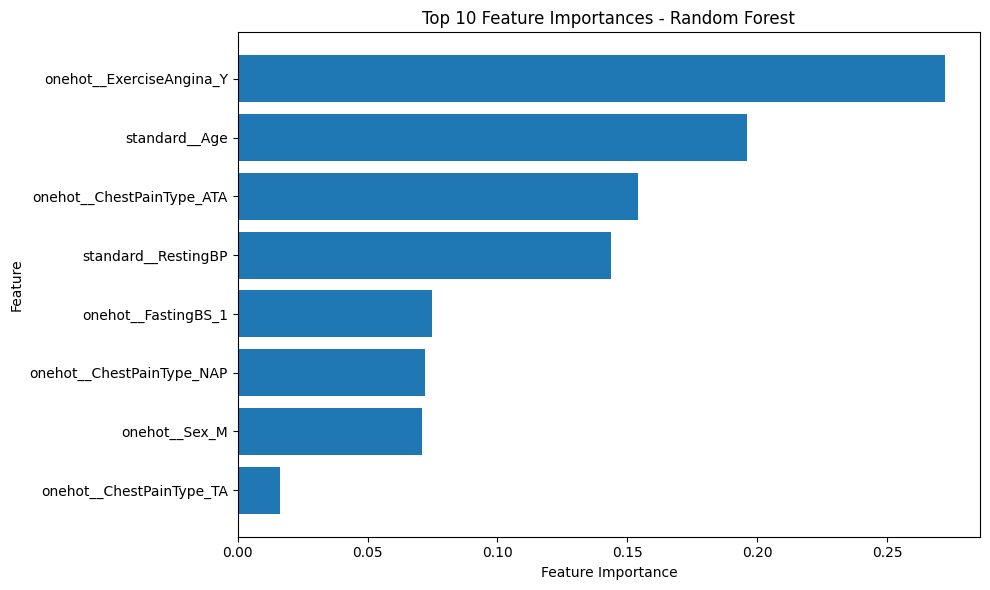

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ambil pipeline terbaik
best_pipeline = random_search.best_estimator_

# Ambil model RandomForest dari pipeline
rf_model = best_pipeline.named_steps['rf']

# Ambil preprocessor (sudah di-fit)
preprocessor = best_pipeline.named_steps['preprocessor']

# Ambil nama-nama fitur hasil transformasi
try:
    feature_names = preprocessor.get_feature_names_out()
except:
    # Kalau preprocessor gabungan (ColumnTransformer), kita ambil manual
    feature_names = []
    for name, transformer, cols in preprocessor.transformers_:
        if transformer == 'drop':
            continue
        elif transformer == 'passthrough':
            feature_names.extend(cols)
        else:
            try:
                # Bisa panggil get_feature_names_out
                names = transformer.get_feature_names_out(cols)
                feature_names.extend(names)
            except:
                # Kalau tidak bisa, pakai nama kolom mentahnya
                feature_names.extend(cols)

# Pastikan panjangnya cocok
print(f"Jumlah feature names: {len(feature_names)}")
print(f"Jumlah feature importances: {len(rf_model.feature_importances_)}")

# Sekarang aman bikin DataFrame
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': rf_model.feature_importances_
}).sort_values(by='importance', ascending=False)

# Tampilkan 10 besar
print(feature_importance_df.head(10))

# Plot top 10
plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['feature'][:10][::-1], feature_importance_df['importance'][:10][::-1])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances - Random Forest')
plt.tight_layout()
plt.show()


In [47]:
import shap
import pandas as pd
import numpy as np

# 1. Ambil model terbaik dari hasil RandomizedSearchCV
best_model = random_search.best_estimator_

# 2. Pisahkan preprocessor dan RandomForest-nya
fitted_preprocessor = best_model.named_steps['preprocessor']
fitted_rf = best_model.named_steps['rf']

# 3. Transform data training
X_train_transformed = fitted_preprocessor.transform(X_train)

# 4. Jika hasil transformasi berupa sparse matrix, ubah ke array biasa
if hasattr(X_train_transformed, "toarray"):
    X_train_transformed = X_train_transformed.toarray()

# 5. Ambil nama fitur hasil preprocessing
feature_names = fitted_preprocessor.get_feature_names_out()

# 6. Bungkus jadi DataFrame (opsional tapi sangat membantu interpretasi)
X_trans_df = pd.DataFrame(X_train_transformed, columns=feature_names)

# 7. Inisialisasi SHAP TreeExplainer
explainer = shap.TreeExplainer(fitted_rf)

# 8. Hitung SHAP values
shap_values = explainer.shap_values(X_train_transformed)

# 9. Plot SHAP summary (untuk kelas 1)
shap.summary_plot(shap_values[1], X_trans_df)


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

<Figure size 640x480 with 0 Axes>

In [ ]:
import shap

# Ambil model terbaik hasil RandomizedSearchCV
best_model = random_search.best_estimator_

# Pisahkan preprocessor dan model RandomForest
fitted_preprocessor = best_model.named_steps['preprocessor']
fitted_rf = best_model.named_steps['rf']

# Transform X_train menggunakan preprocessor
X_train_transformed = fitted_preprocessor.transform(X_train)

# Inisialisasi TreeExplainer dengan model RandomForest
explainer = shap.TreeExplainer(fitted_rf)

# Hitung SHAP values
shap_values = explainer.shap_values(X_train_transformed)

# Dapatkan nama fitur setelah transformasi
# Ini bisa kompleks tergantung pipeline preprocessing, contoh di bawah untuk kombinasi OneHot dan numerical
feature_names = fitted_preprocessor.get_feature_names_out()

# Plot summary
shap.summary_plot(shap_values[1], X_train_transformed, feature_names=feature_names)


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

<Figure size 640x480 with 0 Axes>